In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False).connect()


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


/var/folders/5m/1_wmbbtd1tv28s4b6t4slfn80000gn/T/ipykernel_2261/2880897608.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# Print all of the classes mapped to the Base
from sqlalchemy import create_engine, inspect
inspector = inspect(engine)
table_names = inspector.get_table_names()
table_names


['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create a session
session = Session(engine)

In [9]:
#table measurement column names
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#table station- column names
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
session.query(func.max(Measurement.date)).first()


('2017-08-23',)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
import datetime as dt

# Starting from the most recent data point in the database.
latest_date_str = session.query(func.max(Measurement.date)).scalar()

# Calculate the date one year prior
year_ago = dt.datetime.strptime(latest_date_str, '%Y-%m-%d').date() - dt.timedelta(days=365)
print("Query Date: ", year_ago)


Query Date:  2016-08-23


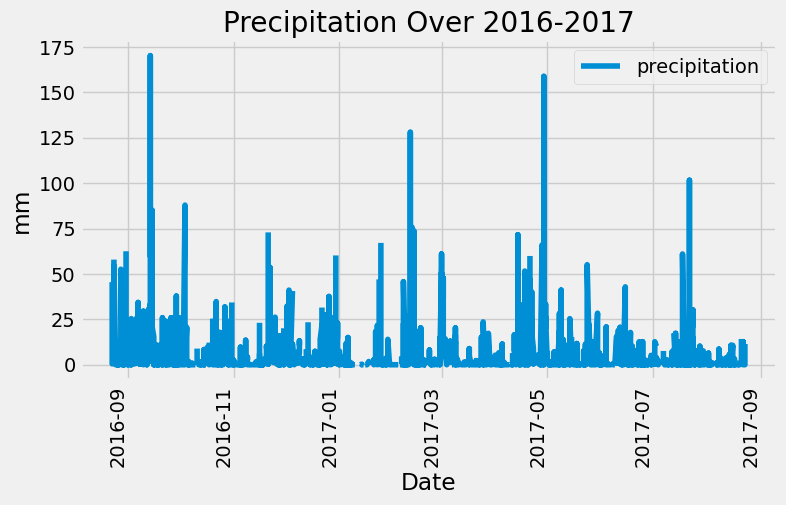

In [21]:

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('date', inplace=True)
df.plot(figsize=(8, 5), title='Precipitation Over 2016-2017')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('mm')
plt.show()


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).scalar()

9

In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(
    Station.station,
    func.count(Measurement.id).label('count')
).join(Measurement, Station.station == Measurement.station)\
 .group_by(Station.station)\
 .order_by(func.count(Measurement.id).desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the prtevious query, calculate the lowest, highest, and average temperature.


In [37]:
temperature_stats = session.query(
    func.min(Measurement.tobs).label('min_temp'),
    func.max(Measurement.tobs).label('max_temp'),
    func.avg(Measurement.tobs).label('avg_temp')
).filter(Measurement.id == a)
print(f"Lowest Temperature: {temperature_stats.min_temp}")
print(f"Highest Temperature: {temperature_stats.max_temp}")
print(f"Average Temperature: {temperature_stats.avg_temp:.2f}") 

AttributeError: 'Query' object has no attribute 'min_temp'

Text(0.5, 4.183333333333314, 'Temperature')

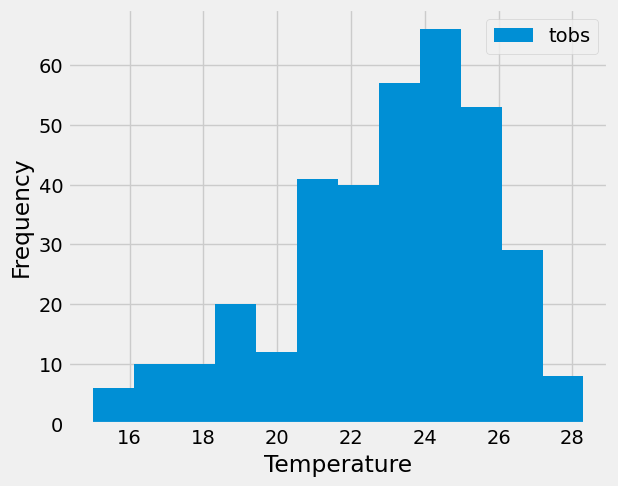

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()
